In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import time
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp
plt.style.use('paper.mplstyle')
%matplotlib inline

In [2]:
resshadowtimes = pd.read_csv("../csvs/external/tamayoresonantshadowtimes.csv", index_col=0)
resshadowtimes = resshadowtimes[ (resshadowtimes["instability_time"] < 1e8 ) &
                       (resshadowtimes["instability_time"] > 1e5 )]
res_diff_times = np.log10(resshadowtimes["instability_time"]) - np.log10(resshadowtimes["shadow_instability_time"])


randshadowtimes = pd.read_csv("../csvs/external/tamayorandomshadowtimes.csv", index_col =0)
randshadowtimes  = randshadowtimes [(randshadowtimes ["t"] > 1e5) &
                              (randshadowtimes ["t"] < 1e8)]
random_diff_times = np.log10(randshadowtimes["t"]) - np.log10(randshadowtimes["t_shadow"])
print(res_diff_times.shape)
print(random_diff_times.shape)

(4177,)
(4496,)


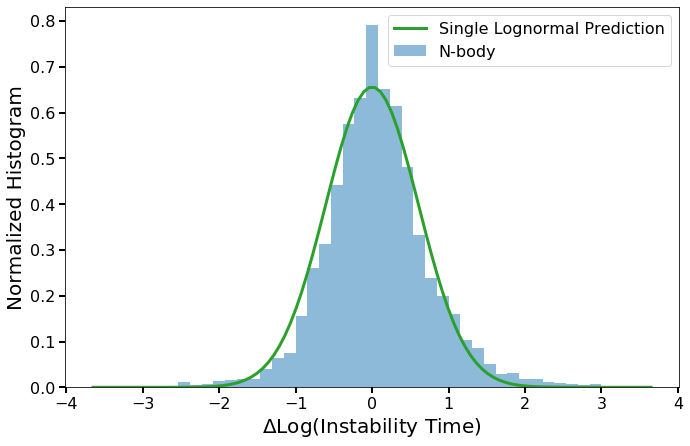

In [3]:
cmap = plt.get_cmap("tab10")

diff_times = np.concatenate([random_diff_times, res_diff_times])

fig, ax1 = plt.subplots(figsize = (11, 7))
bins = np.linspace(-3,3,40)
ax1.hist(res_diff_times, density = 1, alpha = 0.5, label= "N-body", bins = bins)

sig = 0.43 * np.sqrt(2.)

x = np.linspace(-6*sig, 6*sig, 100)
prob_sig = norm.pdf(x, 0, sig)
ax1.plot(x, prob_sig, linewidth = 3, c=cmap(2), label = "Single Lognormal Prediction")

        
ax1.legend()
ax1.set_xlabel('$\Delta$Log(Instability Time)')
ax1.set_ylabel('Normalized Histogram')
fig.savefig('fig4.pdf', bbox_inches='tight')